In [1]:
from tqdm import tqdm
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.utils.data import ConcatDataset

import matplotlib.pyplot as plt
from torchvision.utils import make_grid
import torchvision.transforms.functional as F

import medmnist
from medmnist import INFO, Evaluator

In [2]:
print(f"MedMNIST v{medmnist.__version__} @ {medmnist.HOMEPAGE}")

MedMNIST v3.0.2 @ https://github.com/MedMNIST/MedMNIST/


# We first work on a 2D dataset with size 28x28

In [3]:
data_flag = 'bloodmnist'
download = True
BATCH_SIZE = 128

info = INFO[data_flag]
task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])

DataClass = getattr(medmnist, info['python_class'])

## First, we read the MedMNIST data, preprocess them, concatenate them and encapsulate them into dataloader form.

In [7]:

# preprocessing
data_transform = transforms.Compose([
    transforms.ToTensor(),
    # change size to 32x32
    transforms.Lambda(lambda x: F.resize(x, (32, 32))),
])

# Load all splits
train = DataClass(split='train', transform=data_transform, download=True)
val = DataClass(split='val', transform=data_transform, download=True)
test = DataClass(split='test', transform=data_transform, download=True)

# Combine them into a single dataset
full_dataset = ConcatDataset([train, val, test])
dataloader = DataLoader(full_dataset, batch_size=128, shuffle=True)

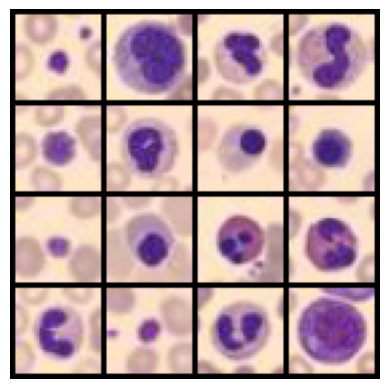

In [8]:
# visualization
# Get a few samples
samples = [full_dataset[i][0] for i in range(16)]  # assuming (image, label) tuples

# Make a grid
grid = make_grid(samples, nrow=4)

# Display
plt.imshow(F.to_pil_image(grid))
plt.axis('off')
plt.show()

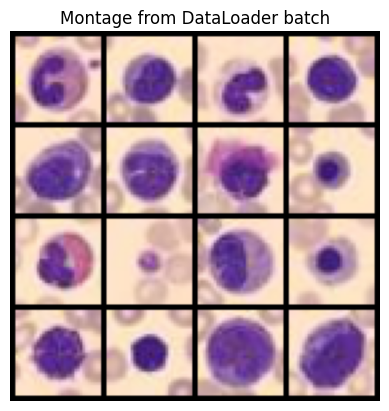

In [9]:
#Another option to visualize the dataset
data_iter = iter(dataloader)
images, labels = next(data_iter)  # get one batch

# Make grid
grid = make_grid(images[:16], nrow=4)  # you can adjust how many to show

# Display
plt.imshow(F.to_pil_image(grid))
plt.axis('off')
plt.title("Montage from DataLoader batch")
plt.show()

In [10]:
#assess image size
print(f"Image size: {images[0].shape}")

#assess label size
print(f"Label size: {labels[0].shape}")

#assess label values
s = set()
for i in range(len(labels)):
    s.add(labels[i].item())
print(f"Label values: {s}")

Image size: torch.Size([3, 32, 32])
Label size: torch.Size([1])
Label values: {0, 1, 2, 3, 4, 5, 6, 7}


# EXPLORE

In [18]:
# get the number of classes
labels_list = (labels.numpy().reshape(-1))

len(labels_list)

128

In [27]:
all_labels = np.array([full_dataset[i][1] for i in range(len(full_dataset))])
all_labels = all_labels.reshape(-1)
all_labels

array([7, 3, 6, ..., 3, 1, 7], shape=(17092,))

Label 7: 2348 occurrences
Label 3: 2895 occurrences
Label 6: 3329 occurrences
Label 2: 1551 occurrences
Label 1: 3117 occurrences
Label 5: 1420 occurrences
Label 0: 1218 occurrences
Label 4: 1214 occurrences


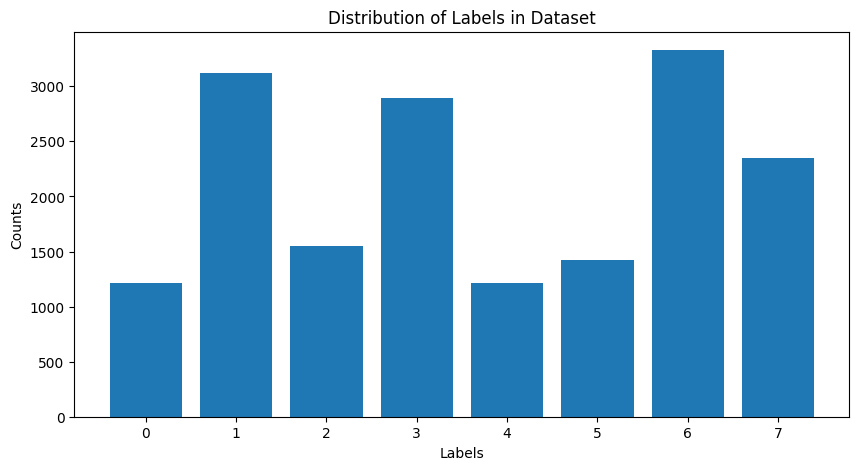

In [30]:
all_labels_list = all_labels.tolist()

# Count the number of occurrences of each label
label_counts = {}
for label in all_labels_list:
    if label in label_counts:
        label_counts[label] += 1
    else:
        label_counts[label] = 1

# Print the counts
for label, count in label_counts.items():
    print(f"Label {label}: {count} occurrences")

# Plot the distribution of labels
plt.figure(figsize=(10, 5))
plt.bar(label_counts.keys(), label_counts.values())
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('Distribution of Labels in Dataset')
plt.xticks(list(label_counts.keys()))
plt.show()